In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install bertopic[visualization]

In [68]:
import json
from bertopic import BERTopic
import numpy as np

Leer Tweets extraídos

In [ ]:
def extraer_cuentas_y_twets_usuarios_json(lista_cuentas, lista_tweets, diccionario_tweets):
    with open("tweets.json", 'r') as fp:
        diccionario_tweets = json.load(fp)
        for i in range(len(diccionario_tweets['data'].keys())):
            lista_cuentas.append(diccionario_tweets['includes'][str(i)])
            lista_tweets.append(diccionario_tweets['data'][str(i)]['text'])

        print('Cantidad: ',len(lista_cuentas))
        return len(diccionario_tweets['data'])

In [ ]:
with open("tweets.json") as fp:
    diccionario_tweets = json.load(fp)

In [ ]:
cuentas_usuarios = []
tweets = []
diccionario_tweets = {'data':{}, 'includes':{}}
extraer_cuentas_y_twets_usuarios_json(cuentas_usuarios, tweets, diccionario_tweets)

Cantidad:  9788


9788

In [ ]:
tweets[0]

'quiero llorar d lo mal q m siento'

In [ ]:
model = BERTopic(language='spanish', calculate_probabilities=True)
topics, probabilities = model.fit_transform(tweets)

In [ ]:
model.get_topic_freq().head()

,Topic,Count
0,-1,3490
1,0,871
2,1,502
3,2,304
4,3,283


In [ ]:
model.get_topic(0)

[('cansada', 0.048373026314697185),
 ('cansado', 0.035174157087209924),
 ('tô', 0.019226962853962585),
 ('dormir', 0.018782941801884258),
 ('estoy', 0.017119183299764282),
 ('eu', 0.01139282916680208),
 ('de', 0.0112635469450854),
 ('insomnio', 0.010594102326035235),
 ('to', 0.010485480619421566),
 ('hoje', 0.010368446322316954)]

In [ ]:
model.save("my_model")

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_distribution(probabilities[0])

### **Segunda parte**
Leeré los comentarios clasificados, buscaré en qué tópico cayeron y trataré de indentificar los tópicos con más personas que tienen algún problema.

In [58]:
nombre_archivo_clasificacion = "clasificacion.txt"

In [59]:
contenido = list()
with open(nombre_archivo_clasificacion, 'r+') as archivo:
    contenido = archivo.readlines()

In [ ]:
contenido

In [61]:
cont = int(contenido.pop())
problemas_mentales = list(map(lambda x : 1 if (x[0:1]) == 's' else 0, contenido))

In [85]:
problemas_mentales = np.asarray(problemas_mentales)

In [86]:
sum(problemas_mentales)

30

In [87]:
topicos_documentos_clasificados = model.topics_[:cont]

In [88]:
topicos_documentos_clasificados = np.asarray(topicos_documentos_clasificados)

In [91]:
topicos_documentos_depresivos = topicos_documentos_clasificados[problemas_mentales == 1]

In [92]:
len(topicos_documentos_depresivos)

30

In [93]:
topicos_documentos_depresivos

array([  1,  15,  -1,   3,  83,  82,  -1,   0,  -1,  34,  -1,   3,   1,
        -1,  47,   1,   2,  -1,   6, 102,  -1,   2,  -1,   1,  11,  23,
         1,   1,  -1,   0])

In [97]:
topicos_documentos_depresivos_limpio = [x for x in topicos_documentos_depresivos if x != -1]

<function matplotlib.pyplot.show(*args, **kw)>

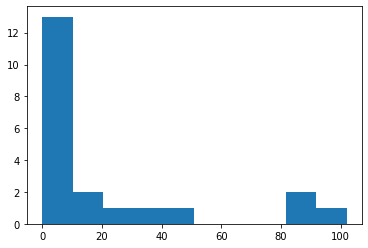

In [98]:
import matplotlib.pyplot as plt

plt.hist(topicos_documentos_depresivos_limpio)
plt.show

In [100]:
model.get_topic(1)

[('llorar', 0.048961027903292535),
 ('quiero', 0.02880948815171183),
 ('ganas', 0.02006291272303433),
 ('voy', 0.019808792651558806),
 ('me', 0.017898827315734618),
 ('no', 0.013365561486560299),
 ('tengo', 0.012773845235760728),
 ('de', 0.011689477446122351),
 ('mi', 0.01127453096471848),
 ('en', 0.010973293896451382)]